# Training a DNN to classify neuro-degenerative disease gait spectrograms
In this notebook, a deep neural network will be trained on the data set created on *2_DatasetCreation.ipynb*. As a reminder, each training example corresponds to  the spectrogram (actually only *part* of the spectrogram) of a 30 second segment of gait signal from a patient of one of three neurodegenerative diseases (ALS, Huntington's, Parkinson's) or a control subject.

The work presented in this notebook is part of a project that aims to use Generative Adversarial Networks to improve the performance of classifiers. Therefore, the network trained in this notebook will serve as a baseline model which will be compared with the future results of a GAN trained on the same data.

## Set up
Keras will be used, using tensorflow as backend. Some other useful packages are imported as well

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from keras import initializers

import keras.utils

%matplotlib inline

## Loading the dataset
The dataset built in *2_DatasetCreation.ipynb* should be stored on ```/data/processed```.

In [2]:
rootdir = os.pardir
in_dir = os.path.join(rootdir, 'data/processed')

train_data = np.load(os.path.join(in_dir, 'train.npz'))
test_data = np.load(os.path.join(in_dir, 'test.npz'))

In [3]:
X_train_orig = train_data['X_train']
Y_train = train_data['Y_train']
X_test_orig = test_data['X_test']
Y_test = test_data['Y_test']

In [4]:
X_train_orig.shape

(1045, 11, 34)

In [5]:
X_test_orig.shape

(72, 11, 34)

In [6]:
### remember ###
# 
# classes = {
#    'control': 0,
#    'als': 1,
#    'hunt': 2,
#    'park': 3}

# number of control subject examples in train set
m_train_control = np.sum(Y_train == np.zeros_like(Y_train))
# number of als examples in train set
m_train_als = np.sum(Y_train == 1 * np.ones_like(Y_train))
# number of hunt examples in train set
m_train_hunt = np.sum(Y_train == 2 * np.ones_like(Y_train))
# number of park examples in train set
m_train_park = np.sum(Y_train == 3 * np.ones_like(Y_train))

print('There are {0} control training examples'.format(m_train_control))
print('There are {0} ALS training examples'.format(m_train_als))
print('There are {0} hunt training examples'.format(m_train_hunt))
print('There are {0} park training examples'.format(m_train_park))

There are 270 control training examples
There are 191 ALS training examples
There are 333 hunt training examples
There are 251 park training examples


## Reshape data
The data is reshaped (matrix -> vector) and normalized. The labels are converted to one-hot vectors of size C = 4 (number of categories)

In [7]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1)

# normalization of matrices
X_train = X_train / 255
X_test = X_test / 255

# one-hot labels
Y_train_one_hot = keras.utils.to_categorical(Y_train, num_classes = 4)
Y_test_one_hot = keras.utils.to_categorical(Y_test, num_classes = 4)

## Build model
A simple neural network is built with keras

In [8]:
m_train, n_x = X_train.shape
m_test = X_test.shape[0]
n_y = Y_train_one_hot.shape[1]

L = 2

layers_dims = [n_x, (n_x+n_y)//2, n_y] # first corresponds to input

learning_rate = 0.001

In [9]:
# initial configuration of NN

model = Sequential()

model.add(Dense(layers_dims[1], input_shape=(n_x,), activation='relu',
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))


model.add(Dense(n_y, activation='softmax',
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))

optimizer = optimizers.Adam(lr=learning_rate)

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# maybe configure callback for early stopping?
# feed also validation data to check metrics?

## Train model

In [10]:
# using full gradient descent - batch_size = m_train
model.fit(X_train, Y_train_one_hot, epochs=400, batch_size=128)

Epoch 1/400
1045/1045 [==============================] - 2s 2ms/step - loss: 1.3262 - acc: 0.3502
Epoch 2/400
1045/1045 [==============================] - 0s 71us/step - loss: 1.2387 - acc: 0.3818
Epoch 3/400
1045/1045 [==============================] - 0s 71us/step - loss: 1.1914 - acc: 0.4172
Epoch 4/400
1045/1045 [==============================] - 0s 70us/step - loss: 1.1566 - acc: 0.4823
Epoch 5/400
1045/1045 [==============================] - 0s 74us/step - loss: 1.1372 - acc: 0.4325
Epoch 6/400
1045/1045 [==============================] - 0s 73us/step - loss: 1.1143 - acc: 0.5158
Epoch 7/400
1045/1045 [==============================] - 0s 79us/step - loss: 1.0976 - acc: 0.4976
Epoch 8/400
1045/1045 [==============================] - 0s 70us/step - loss: 1.0723 - acc: 0.5234
Epoch 9/400
1045/1045 [==============================] - 0s 78us/step - loss: 1.0622 - acc: 0.5301
Epoch 10/400
1045/1045 [==============================] - 0s 72us/step - loss: 1.0458 - acc: 0.5627
Epoch 11/4

1045/1045 [==============================] - 0s 66us/step - loss: 0.4897 - acc: 0.8450
Epoch 84/400
1045/1045 [==============================] - 0s 68us/step - loss: 0.4803 - acc: 0.8612
Epoch 85/400
1045/1045 [==============================] - 0s 68us/step - loss: 0.4795 - acc: 0.8373
Epoch 86/400
1045/1045 [==============================] - 0s 70us/step - loss: 0.5022 - acc: 0.8258
Epoch 87/400
1045/1045 [==============================] - 0s 69us/step - loss: 0.4971 - acc: 0.8268
Epoch 88/400
1045/1045 [==============================] - 0s 68us/step - loss: 0.4746 - acc: 0.8469
Epoch 89/400
1045/1045 [==============================] - 0s 74us/step - loss: 0.4818 - acc: 0.8411
Epoch 90/400
1045/1045 [==============================] - 0s 68us/step - loss: 0.4786 - acc: 0.8316
Epoch 91/400
1045/1045 [==============================] - 0s 69us/step - loss: 0.5024 - acc: 0.8124
Epoch 92/400
1045/1045 [==============================] - 0s 71us/step - loss: 0.4848 - acc: 0.8211
Epoch 93/400


1045/1045 [==============================] - 0s 80us/step - loss: 0.1054 - acc: 0.9923
Epoch 246/400
1045/1045 [==============================] - 0s 78us/step - loss: 0.1027 - acc: 0.9914
Epoch 247/400
1045/1045 [==============================] - 0s 77us/step - loss: 0.1057 - acc: 0.9914
Epoch 248/400
1045/1045 [==============================] - 0s 72us/step - loss: 0.0984 - acc: 0.9952
Epoch 249/400
1045/1045 [==============================] - 0s 79us/step - loss: 0.1041 - acc: 0.9904
Epoch 250/400
1045/1045 [==============================] - 0s 80us/step - loss: 0.0975 - acc: 0.9923
Epoch 251/400
1045/1045 [==============================] - 0s 84us/step - loss: 0.1012 - acc: 0.9904
Epoch 252/400
1045/1045 [==============================] - 0s 80us/step - loss: 0.1007 - acc: 0.9904
Epoch 253/400
1045/1045 [==============================] - 0s 80us/step - loss: 0.0996 - acc: 0.9923
Epoch 254/400
1045/1045 [==============================] - 0s 50us/step - loss: 0.0965 - acc: 0.9933
Epoc

## Evaluate model

In [11]:
model.evaluate(X_test, Y_test_one_hot)

72/72 [==============================] - 0s 1ms/step


[3.561838838789198, 0.3472222222222222]

It works horribly! Between 30 and 40 % accuracy

In [34]:
predictions = model.predict(X_test)
Y_pred = predictions.argmax(axis=1)
Y_pred = Y_pred.reshape(Y_test.shape[0], -1)
correct_predictions_mask = Y_pred == Y_test

### Confusion matrix

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

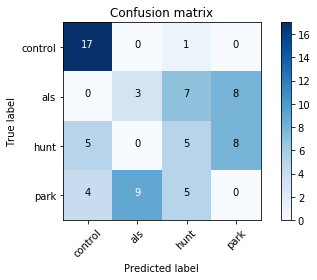

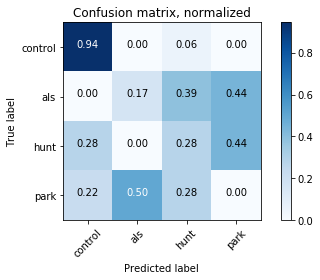

In [39]:
class_names = ['control',
          'als',
          'hunt',
          'park']

cnf = confusion_matrix(Y_test, Y_pred)

plt.figure()
plot_confusion_matrix(cnf, classes=class_names, title='Confusion matrix')
plt.show()

plt.figure()
plot_confusion_matrix(cnf, classes=class_names, title='Confusion matrix, normalized', normalize=True)
plt.show()

Control subjects are generally better recognized, followed by Huntington's. Basically, the model can correctly predict if a healthy subject is indeed healthy but fails at everything else: miscategorizes diseases and labels data points with disease as healthy subjects

All Parkinson's records are wrongly categorized!!

## Precision, recall and F1-score for each class

In [48]:
for k in range(n_y):
    P = (Y_test == k).sum()
    TP = ((Y_pred == k) & (Y_test == k)).sum()
    FP = ((Y_pred == k) & (Y_test != k)).sum()
    # recall
    TPR = TP / P
    # precision
    PPV = TP / (TP + FP)
    #F1-score
    if TPR != 0 and PPV != 0:
        F1score = TPR * PPV / (TPR + PPV)
    else:
        F1score = 'not defined'
    print(f'{class_names[k]} - Precision: {PPV} - Recall: {TPR} - F1-score: {F1score}')

# TODO: define this metrics in keras model

control - Precision: 0.6538461538461539 - Recall: 0.9444444444444444 - F1-score: 0.38636363636363635
als - Precision: 0.25 - Recall: 0.16666666666666666 - F1-score: 0.1
hunt - Precision: 0.2777777777777778 - Recall: 0.2777777777777778 - F1-score: 0.1388888888888889
park - Precision: 0.0 - Recall: 0.0 - F1-score: not defined
